In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
df_total = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_total.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_total due to lack of information
df_total = df_total[~(df_total["PATIENT_NO"].isin([172, 173, 174]))]

df_train = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_train.csv', encoding="utf-8")

df_test = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_test.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_test due to lack of information
df_test = df_test[~(df_test["PATIENT_NO"].isin([172, 173, 174]))]

In [3]:
df_total.info()
df_total.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 202
Data columns (total 18 columns):
PATIENT_NO            200 non-null int64
AGE                   200 non-null float64
SEX                   200 non-null int64
ORIGIN_EUROPE         200 non-null int64
ORIGIN_CHINA          200 non-null int64
ORIGIN_US             200 non-null int64
ORIGIN_ASEAN          200 non-null int64
ORIGIN_DOMESTIC       200 non-null int64
DAYS_OF_ONSET         200 non-null int64
ONSET_FEVER           200 non-null int64
ONSET_COUGH           200 non-null int64
ONSET_TIRED           200 non-null int64
ONSET_SORETHROAT      200 non-null int64
ONSET_RESPIRATORY     200 non-null int64
BACKGROUND_DISEASE    200 non-null int64
HOSPITAL              200 non-null int64
RISK_SCORE            200 non-null int64
LOS                   56 non-null float64
dtypes: float64(2), int64(16)
memory usage: 29.7 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE,LOS
198,199,57.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
199,200,61.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
200,201,23.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
201,202,57.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
202,203,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,NaN


In [4]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 18 columns):
PATIENT_NO            56 non-null int64
AGE                   56 non-null float64
SEX                   56 non-null int64
ORIGIN_EUROPE         56 non-null int64
ORIGIN_CHINA          56 non-null int64
ORIGIN_US             56 non-null int64
ORIGIN_ASEAN          56 non-null int64
ORIGIN_DOMESTIC       56 non-null int64
DAYS_OF_ONSET         56 non-null int64
ONSET_FEVER           56 non-null int64
ONSET_COUGH           56 non-null int64
ONSET_TIRED           56 non-null int64
ONSET_SORETHROAT      56 non-null int64
ONSET_RESPIRATORY     56 non-null int64
BACKGROUND_DISEASE    56 non-null int64
HOSPITAL              56 non-null int64
RISK_SCORE            56 non-null int64
LOS                   56 non-null int64
dtypes: float64(1), int64(17)
memory usage: 8.0 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE,LOS
0,1,66.0,1,0,1,0,0,0,6,0,0,0,0,0,2,1,8,21
1,2,28.0,1,0,1,0,0,0,3,0,0,0,0,0,0,1,8,13
2,3,25.0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,8,5
3,4,29.0,1,0,1,0,0,0,9,0,0,0,0,0,0,0,8,20
4,5,23.0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,8,12


In [5]:
df_test.info()
df_test.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 146
Data columns (total 18 columns):
PATIENT_NO            144 non-null int64
AGE                   144 non-null float64
SEX                   144 non-null int64
ORIGIN_EUROPE         144 non-null int64
ORIGIN_CHINA          144 non-null int64
ORIGIN_US             144 non-null int64
ORIGIN_ASEAN          144 non-null int64
ORIGIN_DOMESTIC       144 non-null int64
DAYS_OF_ONSET         144 non-null int64
ONSET_FEVER           144 non-null int64
ONSET_COUGH           144 non-null int64
ONSET_TIRED           144 non-null int64
ONSET_SORETHROAT      144 non-null int64
ONSET_RESPIRATORY     144 non-null int64
BACKGROUND_DISEASE    144 non-null int64
HOSPITAL              144 non-null int64
RISK_SCORE            144 non-null int64
LOS                   0 non-null float64
dtypes: float64(2), int64(16)
memory usage: 21.4 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE,LOS
142,199,57.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
143,200,61.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
144,201,23.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
145,202,57.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7,NaN
146,203,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,NaN


In [6]:
# target variable (LOS)
LOS = df_train['LOS'].values

# extract patient no to build a new dataset for comparision between models
PATIENT_NO_test = df_test['PATIENT_NO']

In [7]:
# split train set and test set (without y_test)
X_train = df_train.drop(columns = ['LOS', 'PATIENT_NO'])

y_train = LOS

X_test = df_test.drop(columns = ['LOS', 'PATIENT_NO'])

In [8]:
X_train.describe()


,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,34.200893,0.464286,0.535714,0.160714,0.071429,0.0,0.214286,2.214286,0.178571,0.142857,0.053571,0.035714,0.035714,0.071429,0.107143,4.428571
std,15.989657,0.503236,0.503236,0.370591,0.259870,0.0,0.414039,2.852204,0.386459,0.353094,0.227208,0.187256,0.187256,0.322329,0.312094,1.915080
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,29.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,44.250000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,8.000000


In [9]:
X_test.describe()

,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,RISK_SCORE
count,144.000000,144.000000,144.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,36.111111,0.444444,0.472222,0.0,0.041667,0.083333,0.381944,0.868056,0.180556,0.131944,0.013889,0.069444,0.034722,0.034722,0.298611,3.770833
std,16.381002,0.498638,0.500970,0.0,0.200524,0.277350,0.487559,1.986833,0.385992,0.339612,0.117438,0.255096,0.183714,0.183714,0.459246,1.876311
min,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,33.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,49.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
max,88.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [10]:
linear_models = [LinearRegression(),
                Ridge(),
                Lasso(),
                SGDRegressor()]

results = [PATIENT_NO_test]

for model in linear_models:
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    results.append(y_test_preds)
    
    # Grab model name and store results associated with model
    # impossible to calculate r2 score dude to lack of y_test
    name = str(model).split("(")[0]
    print('{} finished.'.format(name))

LinearRegression finished.
Ridge finished.
Lasso finished.
SGDRegressor finished.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [11]:
df_results = pd.DataFrame(np.transpose(results))

df_results = df_results.rename(columns={0 : "PATIENT_NO", 
                                        1 : "LOS_LinearRegression",
                                        2 : "LOS_RidgeRegression",
                                        3 : "LOS_LassoRegression",
                                        4 : "LOS_SGDRegressor"})

df_results

,PATIENT_NO,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression,LOS_SGDRegressor
0,19.0,14.760038,14.808128,14.342727,1.677595e+10
1,20.0,24.633935,23.755643,20.187580,1.645892e+11
2,25.0,21.491937,21.192167,21.767270,5.986754e+10
3,26.0,20.323363,20.089585,20.661487,3.765717e+10
4,28.0,27.051722,24.877969,20.977425,9.518525e+10
5,30.0,16.956205,17.505780,20.503518,7.237332e+10
6,31.0,14.871157,15.882145,17.818045,3.377132e+10
7,32.0,3.307218,7.202311,12.519982,-2.972890e+10
8,34.0,18.171697,18.044446,18.133983,6.752835e+09
9,36.0,18.702493,17.340502,15.729726,6.817085e+10


In [12]:
df_usable_results = df_results.drop(columns = ['LOS_SGDRegressor'])

df_usable_results

,PATIENT_NO,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression
0,19.0,14.760038,14.808128,14.342727
1,20.0,24.633935,23.755643,20.187580
2,25.0,21.491937,21.192167,21.767270
3,26.0,20.323363,20.089585,20.661487
4,28.0,27.051722,24.877969,20.977425
5,30.0,16.956205,17.505780,20.503518
6,31.0,14.871157,15.882145,17.818045
7,32.0,3.307218,7.202311,12.519982
8,34.0,18.171697,18.044446,18.133983
9,36.0,18.702493,17.340502,15.729726


In [13]:
df_usable_results.to_csv(r'./linear_models_untuned.csv', index = False)

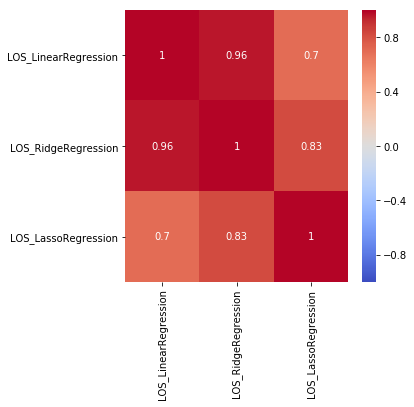

In [14]:
corr_matrix_untuned_results = df_usable_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
fig = sns.heatmap(corr_matrix_untuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
fig.figure.savefig('./corr_matrix_untuned_results.png')

## Parameter tuning for Ridge Regression

In [15]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [16]:
tuned_parameters_Ridge = [{
    'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 5 , 10, 20]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_Ridge = Ridge()
grid_Ridge = GridSearchCV(reg_model_Ridge, tuned_parameters_Ridge, scoring = "neg_mean_squared_error", cv = 5)
grid_Ridge.fit(X_train, y_train)
reg_model_Ridge_optimized = grid_Ridge.best_estimator_

# summarize the results of the grid search
print(grid_Ridge.best_score_)
print(grid_Ridge.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.71926e-20): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.04615e-19): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.12075e-20): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.19857e-20): result may not be accurate.
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.59799e-20): result may not be accurate.
  overwrite_a=True).T


-25.04495365688927
Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
y_test_preds_Ridge = reg_model_Ridge_optimized.predict(X_test)

df_usable_results['LOS_RidgeRegression'] = y_test_preds_Ridge

## Parameter tuning for LASSO Regression

In [18]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [19]:
tuned_parameters_Lasso = [{
    'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 5 , 10, 20]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_Lasso = Lasso(max_iter = 1e5)
grid_Lasso = GridSearchCV(reg_model_Lasso, tuned_parameters_Lasso, scoring = "neg_mean_squared_error", cv = 5)
grid_Lasso.fit(X_train, y_train)
reg_model_Lasso_optimized = grid_Lasso.best_estimator_

# summarize the results of the grid search
print(grid_Lasso.best_score_)
print(grid_Lasso.best_estimator_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

-20.947106162788753
Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
y_test_preds_Lasso = reg_model_Lasso_optimized.predict(X_test)

df_usable_results['LOS_LassoRegression'] = y_test_preds_Lasso

In [21]:
df_usable_results

,PATIENT_NO,LOS_LinearRegression,LOS_RidgeRegression,LOS_LassoRegression
0,19.0,14.760038,14.598153,14.021125
1,20.0,24.633935,21.101584,19.326096
2,25.0,21.491937,21.806514,20.759871
3,26.0,20.323363,20.687443,19.756228
4,28.0,27.051722,21.877744,20.042983
5,30.0,16.956205,20.139358,19.612851
6,31.0,14.871157,17.796554,17.175432
7,32.0,3.307218,11.554057,13.590992
8,34.0,18.171697,18.130919,17.462187
9,36.0,18.702493,16.176464,15.454901


In [22]:
df_usable_results.to_csv(r'./linear_models_tuned.csv', index = False)

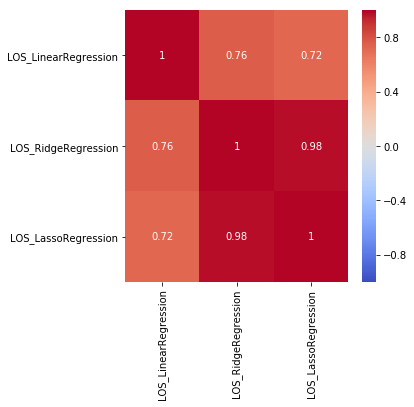

In [23]:
corr_matrix_tuned_results = df_usable_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix_tuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
fig.figure.savefig('./corr_matrix_tuned_results.png')